In [35]:
from scipy.io.wavfile import write, read
from scipy import signal
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import sounddevice as sd
import IPython.display as ipd

In [2]:
# leitura do sinal da gaita

gaita_in, sr = librosa.load('../gaita.wav')        #sr = sample rate 22050

In [3]:
# Audio de entrada

ipd.Audio('../gaita.wav')

In [20]:
# Obtendo a envoltória com filtro passa baixa

gaita_abs = abs(gaita_in)

fc = 30          #freq de corte
Wn = fc / sr     #freq de corte normalizada

print(Wn)

b, a = signal.butter(3, Wn)
env_filt = signal.filtfilt(b, a, gaita_abs)
env_lfilt = signal.lfilter(b, a, gaita_abs)

0.0013605442176870747


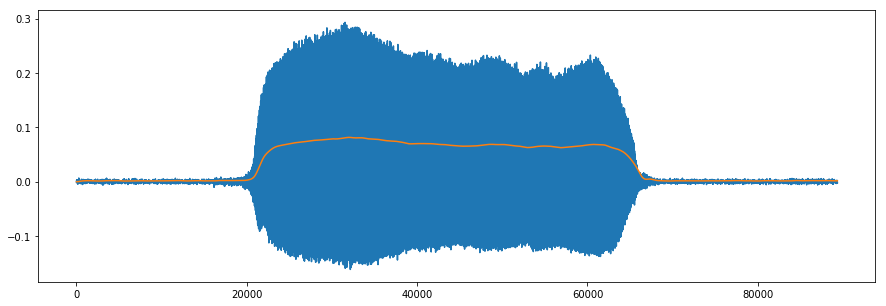

In [22]:
# Plot envoltória com filtro

plt.figure(figsize=(15,5))
# plt.plot(gaita_abs)
plt.plot(gaita_in)
plt.plot(env_lfilt)

plt.show()

In [6]:
# Array de tempo

amostras = np.arange(len(gaita_in))
t = amostras / sr

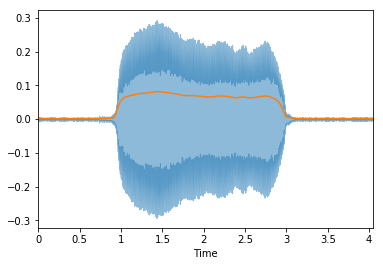

In [24]:
# Plot da envoltória pelo método de filtragem

librosa.display.waveplot(gaita_in, alpha=0.5)
plt.plot(t,env_filt)

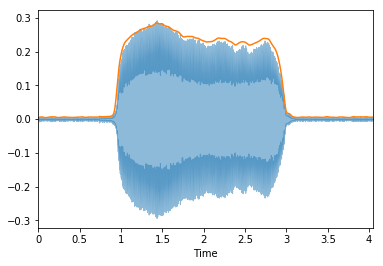

In [27]:
# Multiplicando a envoltória encontrada por uma constante para aproximar ao sinal original

env_filt_ganho = 3.5 * env_filt
librosa.display.waveplot(gaita_in, alpha=0.5)
plt.plot(t,env_filt_ganho)

In [31]:
# Aplicando FFT no sinal da gaita

gaita_fft = fft(gaita_in)

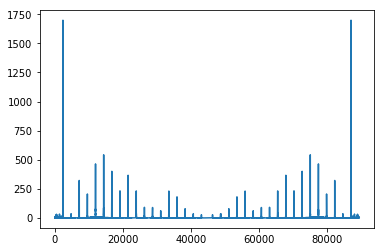

In [34]:
plt.plot(abs(gaita_fft))
plt.show()

In [36]:
shift_gaita_fft = fftshift(gaita_fft)

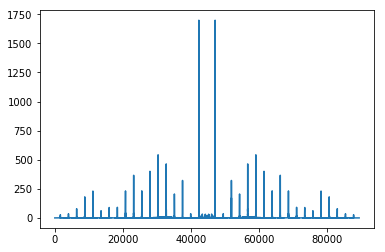

In [37]:
plt.plot(abs(shift_gaita_fft))
plt.show()